In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK resources 
nltk.download('stopwords')

# importing data
train_data = pd.read_excel("Dataset/training_dataset.xlsx")
val_data = pd.read_excel("Dataset/validation_dataset.xlsx")

# Text cleaning
non_content = ['um','uh','mhm','mm','oh','customer','agent','says']

# Function for removing ncw and trimming beginng and end from text
def remove_ncw_trim(raw_text, additional_noncontent_words):
    
    # Replace periods with spaces (if required)
    raw_text = raw_text.replace('.', ' ')
    
    # Define English stop words (from NLTK)
    stop_words = set(stopwords.words('english'))

    # Extend stop words with your custom non-content words
    stop_words.update(additional_noncontent_words)

    # Remove sequences of 'x's or '*'s
    raw_text = re.sub(r'[x*]+', '', raw_text)

    raw_text = re.sub(r'[^A-Za-z\s]', '', raw_text)

    # Split the text into words using whitespace
    uncut_words = raw_text.split()

    # Filter out the stop words and non-content words
    filtered_words = [word for word in uncut_words if word.lower() not in stop_words]
    
    # Join words back to string
    return ' '.join(filtered_words)


train_data['cleaned_text'] = train_data['text'].apply(lambda x: remove_ncw_trim(x, non_content))
val_data['cleaned_text'] = val_data['text'].apply(lambda x: remove_ncw_trim(x, non_content))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Initialize TF-IDF Vectorizer and transform the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['cleaned_text'])
X_validation_tfidf = tfidf_vectorizer.transform(val_data['cleaned_text'])

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, train_data['label'])

# Predict the labels on the validation dataset
val_predictions = classifier.predict(X_validation_tfidf)

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Precision: 0.5854, Recall: 0.5884, Weighted F1 Score: 0.5784, Micro F1 Score: 0.5884


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

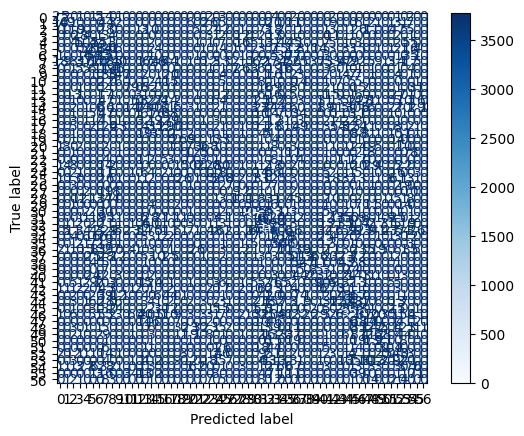

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate Precision, Recall, and F1 Score
precision = precision_score(val_data['label'], val_predictions, average='weighted')
recall = recall_score(val_data['label'], val_predictions, average='weighted')
f1_weighted = f1_score(val_data['label'], val_predictions, average='weighted')
f1_micro = f1_score(val_data['label'], val_predictions, average='micro')

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, Weighted F1 Score: {f1_weighted:.4f}, Micro F1 Score: {f1_micro:.4f}')

# Confusion Matrix
cm = confusion_matrix(val_data['label'], val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [4]:
from xgboost import XGBClassifier

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize classifiers
xgb_classifier = XGBClassifier()

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the labels in the training and validation datasets
train_data['numeric_label'] = le.fit_transform(train_data['label'])
val_data['numeric_label'] = le.transform(val_data['label'])

# Now train the XGBoost classifier with the numeric labels
xgb_classifier.fit(X_train_tfidf, train_data['numeric_label'])
xgb_predictions = xgb_classifier.predict(X_validation_tfidf)

# If you need to reverse transform the predicted numeric labels back to string labels
xgb_predictions_labels = le.inverse_transform(xgb_predictions)

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Precision: 0.5532
Recall: 0.5613
Weighted F1 Score: 0.5524
Micro F1 Score: 0.5613


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

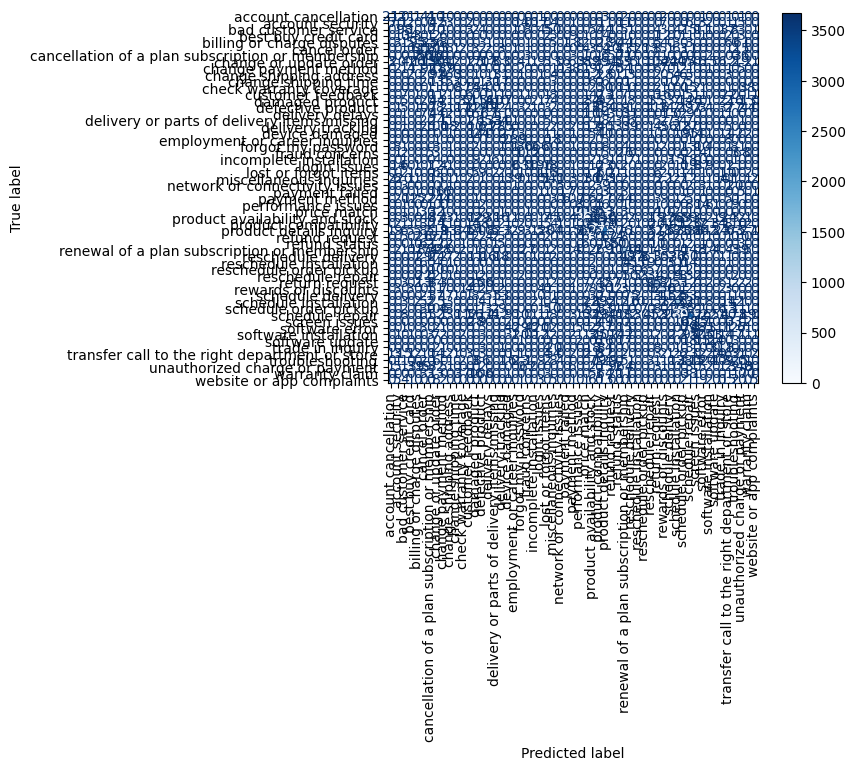

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions from the XGBoost classifier
xgb_predictions = xgb_classifier.predict(X_validation_tfidf)

# Convert the predictions back to the original label format
xgb_predictions_labels = le.inverse_transform(xgb_predictions)

# Calculate various performance metrics
precision = precision_score(val_data['label'], xgb_predictions_labels, average='weighted')
recall = recall_score(val_data['label'], xgb_predictions_labels, average='weighted')
f1_weighted = f1_score(val_data['label'], xgb_predictions_labels, average='weighted')
f1_micro = f1_score(val_data['label'], xgb_predictions_labels, average='micro')

# Print the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Weighted F1 Score: {f1_weighted:.4f}')
print(f'Micro F1 Score: {f1_micro:.4f}')

# Confusion Matrix
cm = confusion_matrix(val_data['label'], xgb_predictions_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

In [8]:
# Train the Logistic Regression classifier with numeric labels
lr_classifier_numeric = LogisticRegression()
lr_classifier_numeric.fit(X_train_tfidf, train_data['numeric_label'])

# Predict the labels on the validation dataset (numeric predictions)
val_predictions_numeric = lr_classifier_numeric.predict(X_validation_tfidf)

# Convert the numeric predictions back to original string labels
val_predictions_from_numeric = le.inverse_transform(val_predictions_numeric)

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

In [9]:
# Initialize metrics dictionary
metrics = {
    'Classifier': ['Logistic Regression (String Labels)', 'Logistic Regression (Numeric Labels)', 'XGBoost'],
    'Precision': [],
    'Recall': [],
    'F1 Weighted': [],
    'F1 Micro': []
}

# List of predictions from each classifier
predictions_list = [val_predictions, val_predictions_from_numeric, xgb_predictions_labels]

# Loop over each set of predictions
for preds in predictions_list:
    metrics['Precision'].append(precision_score(val_data['label'], preds, average='weighted'))
    metrics['Recall'].append(recall_score(val_data['label'], preds, average='weighted'))
    metrics['F1 Weighted'].append(f1_score(val_data['label'], preds, average='weighted'))
    metrics['F1 Micro'].append(f1_score(val_data['label'], preds, average='micro'))

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

                             Classifier  Precision    Recall  F1 Weighted  \
0   Logistic Regression (String Labels)   0.585434  0.588367     0.578374   
1  Logistic Regression (Numeric Labels)   0.585434  0.588367     0.578374   
2                               XGBoost   0.553165  0.561308     0.552426   

   F1 Micro  
0  0.588367  
1  0.588367  
2  0.561308  
